# Итоговая работа по курсу

In [2]:
#Импорт библиотек
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline

## 1.Загрузите файл HR.csv в pandas dataframe

In [3]:
hr = pd.read_csv('HR.csv')

## Описание датасета:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Размер датасета
len(hr.index)

14999

In [6]:
#Вся информация
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Вывод:

Датасет состоит из 14999 строк по сотрудникам компании. Пропусков нет - датасет пригоден для статистической обработки.

## 2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

### Расчет основных статистических метрик:

mean - среднее арифметическое;
std - среднеквадратичное отклонение;
min - минимальное значение;
max - максимальное значение;
50% - медиана (50% квантиль)

In [8]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#Так как при выводе команды (hr.describe()) мода не расчитывается, то сделаем это отдельной командой
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Выводы:
Исходя из анализа полученнных метрик:

1. В среднем 61 % сотрудников удовлетворены своей работой - это говорит о положительной оценке компании.
2. Один раз в год работа всех сотрудников оценивается компанией
3. Максимально у сотрудника за все время работы было 7 проектов, при этом минимальное колличество - 2.
4. В среднем сотрудники работают по 9 часов 22 дня в месяц, при графике работы 5\2.
5. В компании самое продолжительное время работы сотрудника 10 лет. Минимальное время - 2 года. В среднем сотрудники работают 3,5 года.
6. В среднем у 14% сотрудников случались несчастные случаи на работе.
7. Исходя из полученых значений, из компании за все время работы в среднем уволилось 14% сотрудников.
8. В среднем 2% сотрудников получили повышение в последние 5 лет

## 3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [10]:
#Расчет корреляционной матрицы
hr1 = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] #Указываю, что необходимо расчитывать только количественные переменные
hr1.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


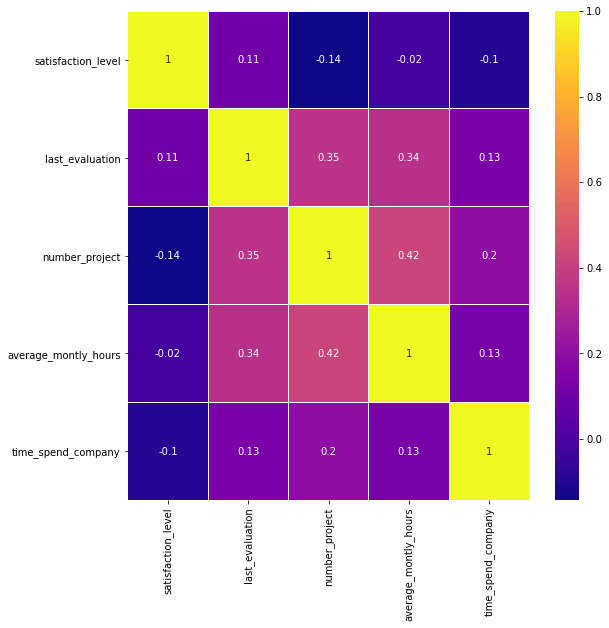

In [11]:
#Визуализация корреляционной матрицы
sns.heatmap(hr1.corr(),annot=True,cmap='plasma',linewidths=0.2)
h=plt.gcf()
h.set_size_inches(9,9)
plt.show()

### Вывод:

Наибольшие коэффициенты корреляции отмечены в парах:

"Среднее количество часов на рабочем месте в месяц - Количество проектов, выполненных за время работы": коэффициент корреляции 0,42;
"Количество проектов, выполненных за время работы - Время с момента последней оценки в годах ": коэффициент корреляции 0,35.

Отрицательная корреляция: 

"Уровень удовлетворенности работой - Количество проектов, выполненных за время работы" (коэф. -0,14);
"Уровень удовлетворенности работой - Стаж работы в компании в годах" (коэф. -0,1)


## 4.Рассчитайте сколько сотрудников работает в каждом департаменте.

In [13]:
#Действующие сотрудники компании по отделам
hr[hr['left']==0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

### Вывод:

Максимальная численность сотрудников в отделах sales, technical и support. 

## 5.Показать распределение сотрудников по зарплатам. 

<AxesSubplot:xlabel='salary', ylabel='left'>

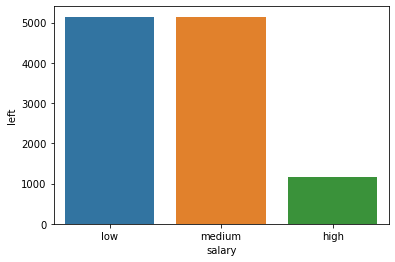

In [14]:
#Распределение зарплат по действующим сотрудникам. Взяты именно действующие сотрудники, так как ЗП могла измениться с момента увольнения сотрудника и информация будет искажена
sns.barplot(x ='salary', 
            y ='left', 
            data = hr[hr['left'] == 0], 
            estimator = len)

### Вывод:

Большинство действующих сотрудников компании получают низкую и среднюю заработную плату.

## 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64


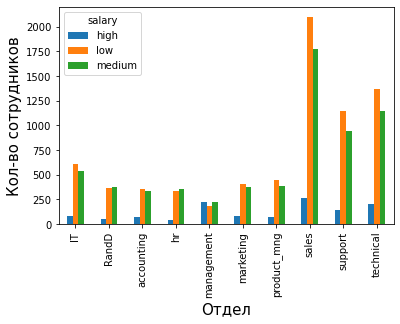

In [16]:
#Распределение зарплат по отделам за все время (с учетом уволившихся)
hr_ = hr.groupby(['department', 'salary'])['satisfaction_level'].count()
hr_.unstack().plot(kind='bar')
plt.xlabel('Отдел', size = 15)
plt.ylabel('Кол-во сотрудников', size = 15)
print(hr_)

department   salary
IT           high        79
             low        437
             medium     438
RandD        high        47
             low        309
             medium     310
accounting   high        69
             low        259
             medium     235
hr           high        39
             low        243
             medium     242
management   high       224
             low        121
             medium     194
marketing    high        71
             low        276
             medium     308
product_mng  high        62
             low        346
             medium     296
sales        high       255
             low       1402
             medium    1469
support      high       133
             low        757
             medium     784
technical    high       176
             low        994
             medium     853
Name: satisfaction_level, dtype: int64


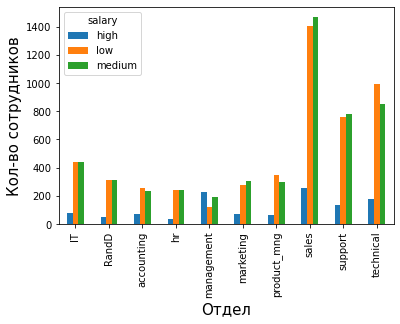

In [17]:
#Распределение зарплат по отделам для действующих сотрудников
hr2 = hr[hr['left'] == 0].groupby(['department', 'salary'])['satisfaction_level'].count()
hr2.unstack().plot(kind='bar')
plt.xlabel('Отдел', size = 15)
plt.ylabel('Кол-во сотрудников', size = 15)
print(hr2)

### Вывод:

Высокие зарплаты у сотрудников из отделов: management, sales, technical. Так же можно отметить, что отделы в которых больше всего сотрудников (sales, management, technical и support), заработная плата в осном низкая и средняя. Отличительный одел - management, только в нем большинство сотрудников имеют высокую заработную плату.

## 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [21]:
descriptives = hr[hr['salary']== 'high']['average_montly_hours']
results = hr[hr['salary']== 'low']['average_montly_hours']
stats.ttest_ind(descriptives, results)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


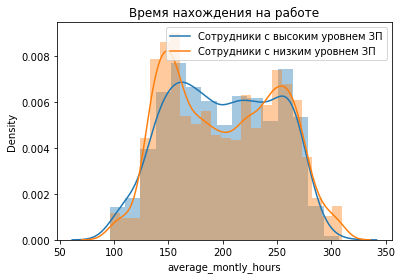

In [22]:
sns.distplot(descriptives)
sns.distplot(results)
plt.title('Время нахождения на работе')
plt.legend(['Сотрудники с высоким уровнем ЗП', 'Сотрудники с низким уровнем ЗП'])
plt.show()

### Вывод:
Нулевая гипотеза подтверждена (pvalue > 5% ), следовательно нет взаимосвязи между указанными параметрами, соответственно уровень заработной платы не влияет на время нахождения сотрудника в офисе.

## 8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):Доля сотрудников с повышением за последние 5 лет, Средняя степень удовлетворенности, Среднее количество проектов


### Действующие сотрудники компании:

In [68]:
hr_left_0 = hr[hr['left'] == 0] 

#### 1.Доля сотрудников с повышением за последние 5 лет

In [69]:
pr = hr_left_0[hr_left_0['promotion_last_5years'] == 1]
result_0 = pr['promotion_last_5years'].count()/hr_left_0['promotion_last_5years'].count()
print(result_0)

0.026251312565628283


#### 2.Средняя степень удовлетворенности

In [71]:
hr_left_0['satisfaction_level'].mean()

0.666809590479516

#### 3.Среднее количество проектов

In [72]:
hr_left_0['number_project'].mean()

3.786664333216661

### Уволившиеся сотрудники компании:

In [73]:
hr_left_1 = hr[hr['left'] == 1]

#### 1.Доля сотрудников с повышением за последние 5 лет

In [75]:
pr1 = hr_left_1[hr_left_1['promotion_last_5years'] == 1]
result_1 = pr1['promotion_last_5years'].count()/hr_left_1['promotion_last_5years'].count()
print(result_1)

0.005320638476617194


#### 2.Средняя степень удовлетворенности

In [76]:
hr_left_1['satisfaction_level'].mean()

0.44009801176140917

#### 3.Среднее количество проектов

In [78]:
hr_left_1['number_project'].mean()

3.8555026603192384

### Вывод:
На основе произведенных расчетов среди уволившихся и действующих сотрудников компании можно сделать вывод, что у действующих сотрудников средняя степень удовлетворенности и доля сотрудников с повышение за последние 5 лет выше, но при этом среднее количество проектов выше у уволившихся сотрудников.
Можно предположить, что эти показатели повлияли на принятие решения сотрудником об увольнении.

## 9.Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr[['satisfaction_level',
                                                          'last_evaluation', 
                                                          'number_project', 
                                                          'average_montly_hours', 
                                                          'time_spend_company', 
                                                          'Work_accident',
                                                          'promotion_last_5years']], hr['left'], test_size=0.25)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
lda = LinearDiscriminantAnalysis()

In [38]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, lda.predict(X_test)]).T
result.head(10)

,0,1
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
5,0,0
6,1,0
7,0,0
8,0,1
9,0,0


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# какая будет точность?
accuracy_score(y_test, lda.predict(X_test))

0.7586666666666667

In [43]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.46573679,  0.66663793, -0.2190535 ,  0.00451801,  0.24498453,
        -1.05681326, -1.0950818 ]])

### Вывод:

По модели LDA на основе  факторов (уровня удовлетворенности работой; времени с момента последней оценки в годах; количеству проектов, выполненных за время работы;
среднему количеству часов на рабочем месте в месяц; стажу работы в компании в годах; несчастным случаям на рабочем месте с сотрудником; повышался ли сотрудник за последние пять лет),
с точностью примерно 76% можно предположить уволится ли сотрудник. 